# **Caesar Cipher**

In [5]:
!pip install langdetect

     |████████████████████████████████| 981 kB 24.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=5460dc48a59d56253beaba47e4fef4c4b1a760105c312bf5ab8e65984dcf2e1e
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [6]:
from langdetect import detect, detect_langs, DetectorFactory

Caesar Cipher is a type of substitution cipher in which each letter in the plaintext is replaced by a letter some fixed number of positions down the alphabet. For example, with a left shift of 3, *D* would be replaced by *A*, *E* would become *B*, and so on.

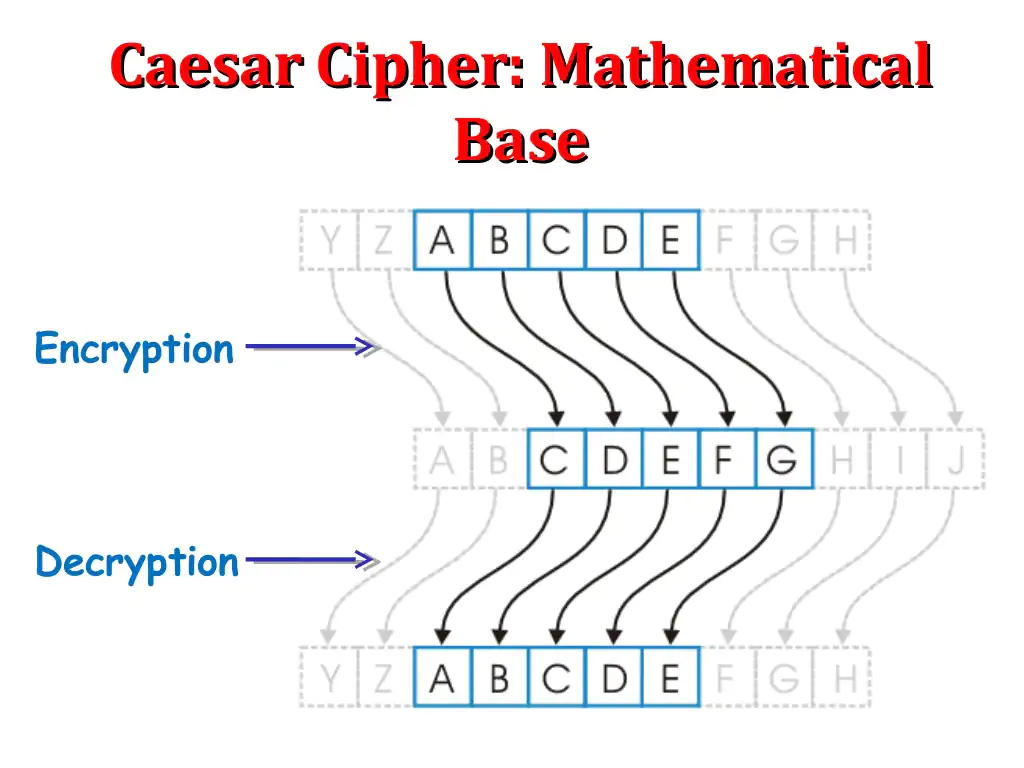

Write a function that given a text string and a shift value, encrypts the text using the caesar cipher.

To prove it is correct, the string "**CEASER CIPHER DEMO**" with right shift value **4**, should encrypt to "**GIEWIV GMTLIV HIQS**".

In [7]:
def encrypt(text,s):

  #Write your answer here
  cipher = ''
  text = text.upper()
  for c in text:
    if c.isalpha():
      cipher += chr(((ord(c)-65)%26 + s)%26 + 65)
    else:
      #keeps spaces, commas, periods, etc.
      cipher += c
  return cipher



#check the above function
text = "CEASER CIPHER DEMO"
s = 4

print("Plain Text : " + text)
print("Shift pattern : " + str(s))
print("Cipher: " + encrypt(text,s))

Plain Text : CEASER CIPHER DEMO
Shift pattern : 4
Cipher: GIEWIV GMTLIV HIQS


**ASCII**

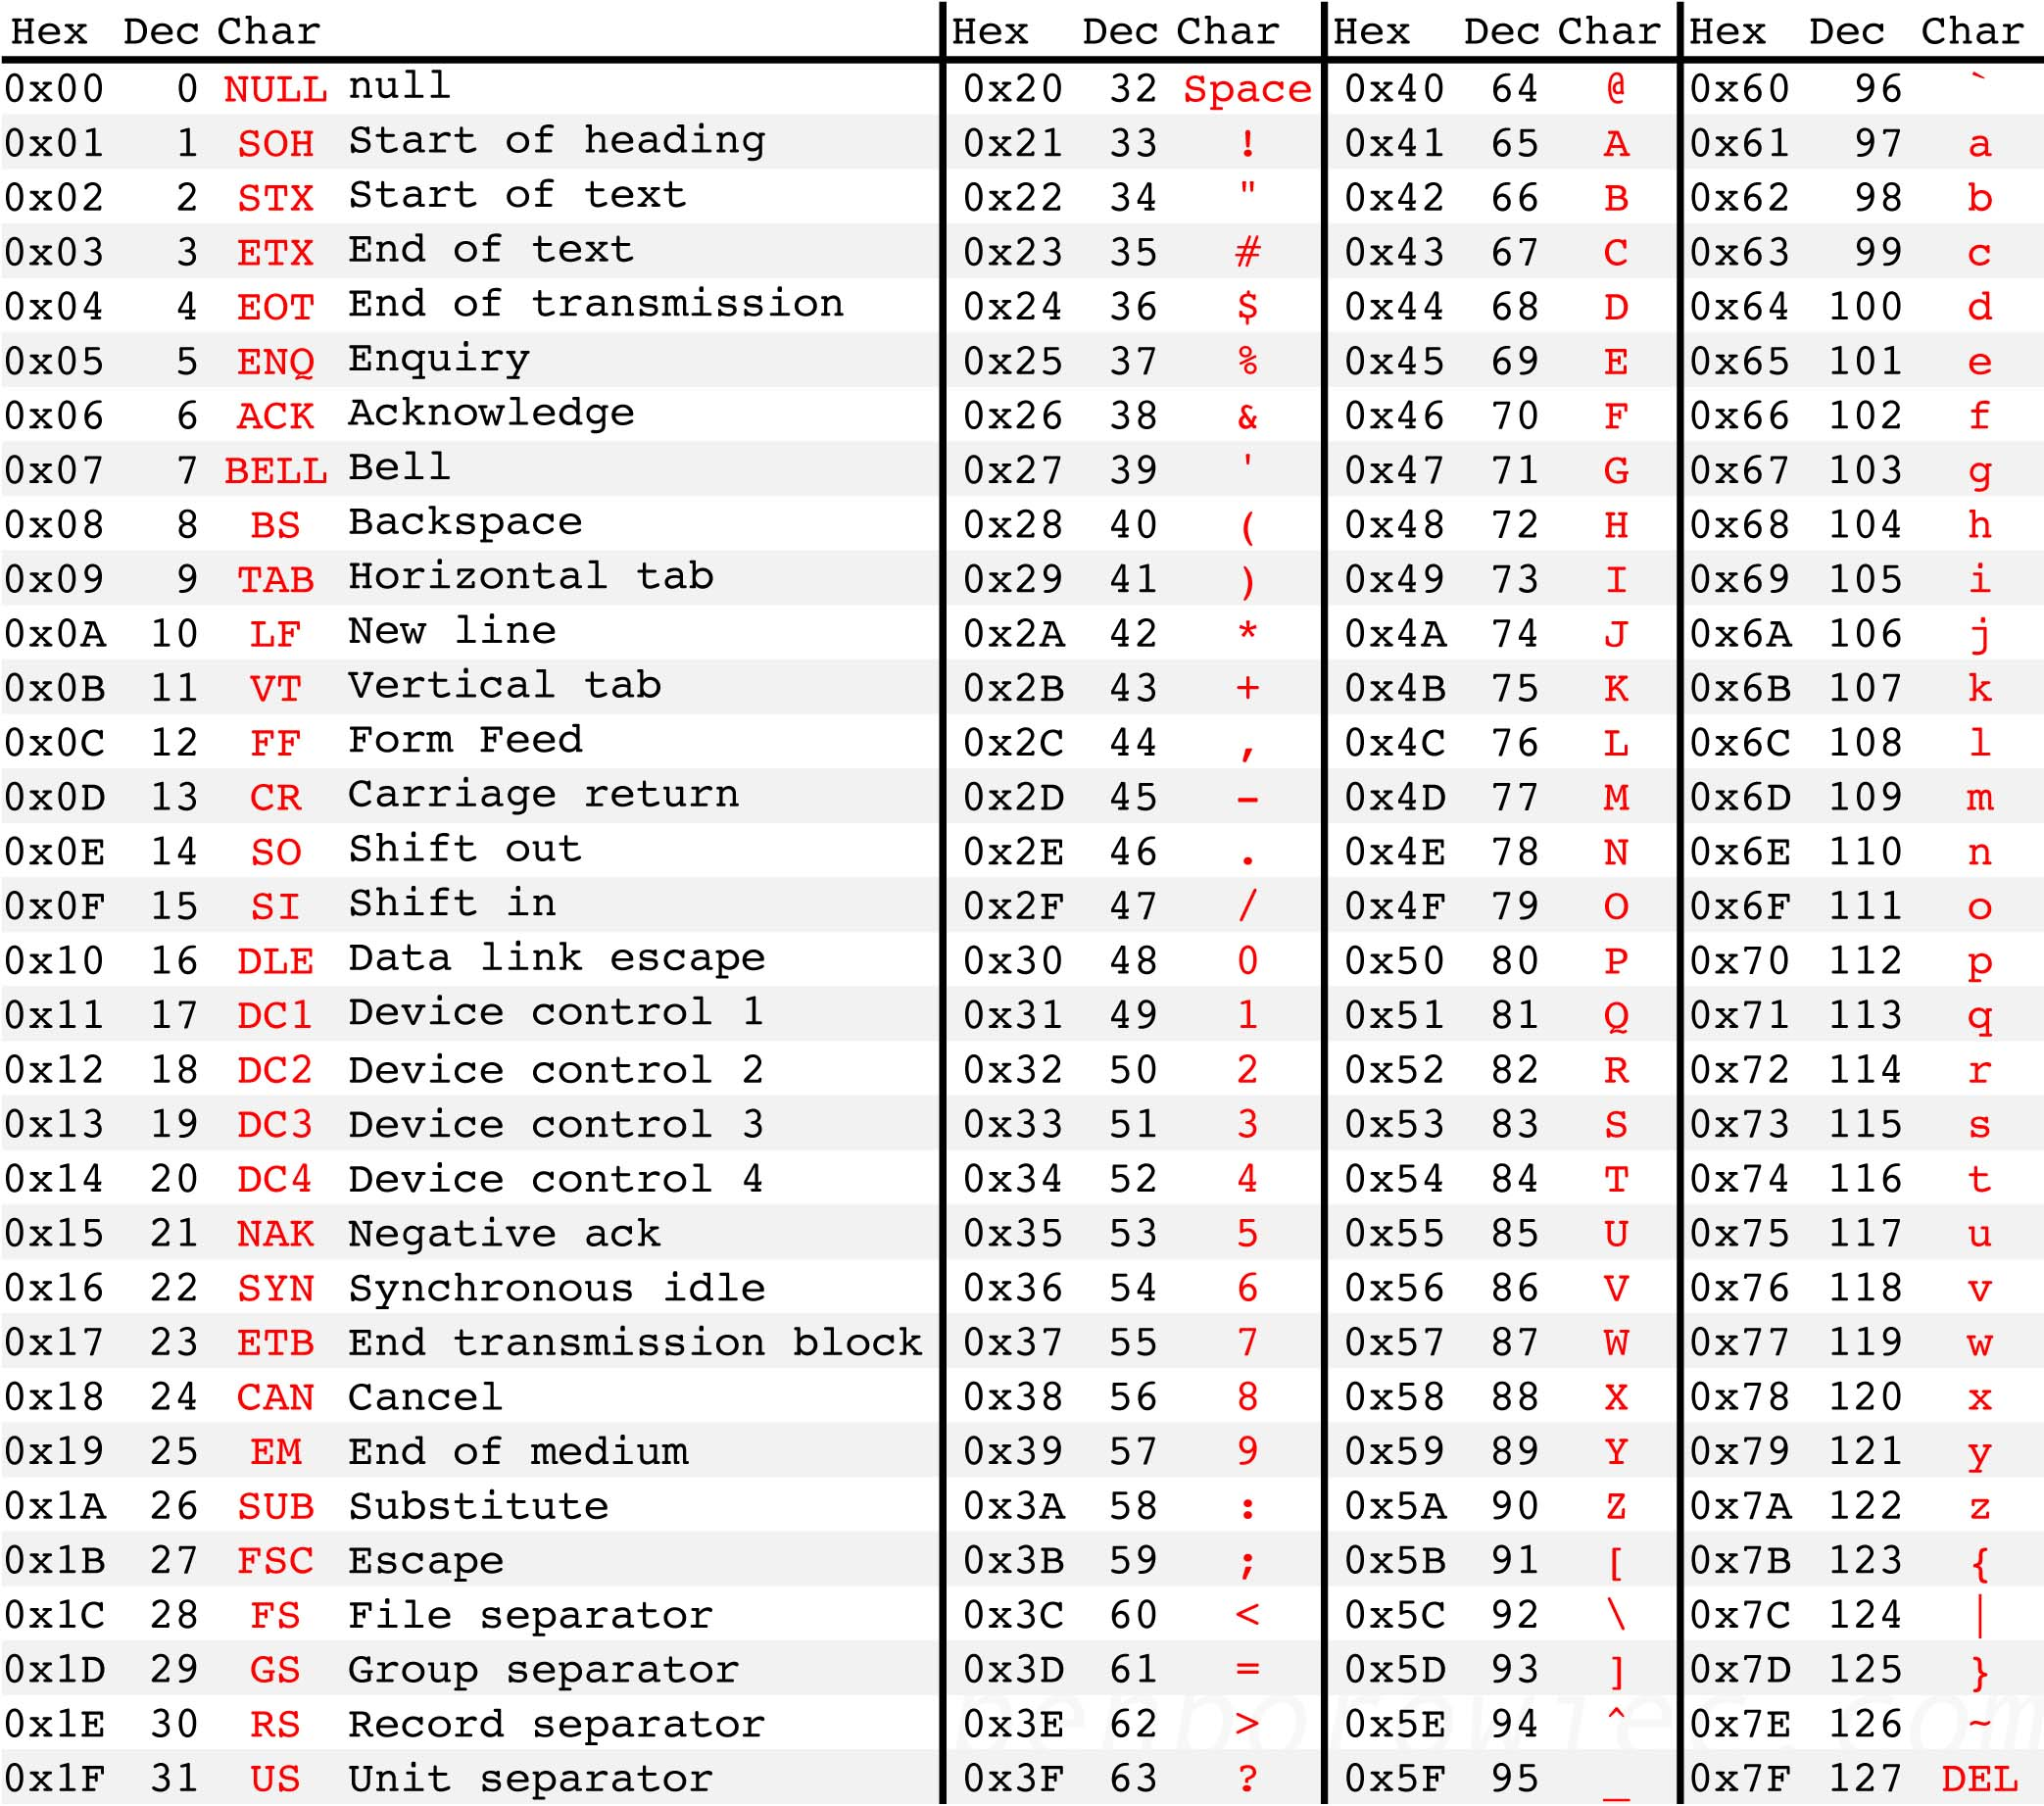

Imagine you have the previous encrypted string, "**GIEWIV GMTLIV HIQS**",  but you don't know the shift value. What would be a good strategy to obtain the plaintext?

Find a way to do it and write the code.

**Hint**: try bruteforcing through all possible shift values.

In [8]:
def decrypt(cipher):
  plain = []
  for s in range(26):
    string = ''

    ## you can replace this second for loop with just calling your original function for encryption, but with a negative key! this is modular
    #s
    for c in cipher:
      if c.isalpha():
        string += chr(((ord(c)-65)%26 + s)%26 + 65)
      else:
        #keeps spaces, commas, periods, etc.
        string += c
    plain.append(string)
  final = []
  for word in plain: 
    if(detect(word) == 'en'):
      final.append(word)
  return 'likely english words:\n' + str(final)+ '\n all words:\n' + str(plain)
message = 'GIEWIV GMTLIV HIQS' #encrypted message
print(decrypt(message))

#Write your answer here

likely english words:
['NPLDPC NTASPC OPXZ', 'TVRJVI TZGYVI UVDF', 'CEASER CIPHER DEMO']
 all words:
['GIEWIV GMTLIV HIQS', 'HJFXJW HNUMJW IJRT', 'IKGYKX IOVNKX JKSU', 'JLHZLY JPWOLY KLTV', 'KMIAMZ KQXPMZ LMUW', 'LNJBNA LRYQNA MNVX', 'MOKCOB MSZROB NOWY', 'NPLDPC NTASPC OPXZ', 'OQMEQD OUBTQD PQYA', 'PRNFRE PVCURE QRZB', 'QSOGSF QWDVSF RSAC', 'RTPHTG RXEWTG STBD', 'SUQIUH SYFXUH TUCE', 'TVRJVI TZGYVI UVDF', 'UWSKWJ UAHZWJ VWEG', 'VXTLXK VBIAXK WXFH', 'WYUMYL WCJBYL XYGI', 'XZVNZM XDKCZM YZHJ', 'YAWOAN YELDAN ZAIK', 'ZBXPBO ZFMEBO ABJL', 'ACYQCP AGNFCP BCKM', 'BDZRDQ BHOGDQ CDLN', 'CEASER CIPHER DEMO', 'DFBTFS DJQIFS EFNP', 'EGCUGT EKRJGT FGOQ', 'FHDVHU FLSKHU GHPR']


# **XOR Cipher**

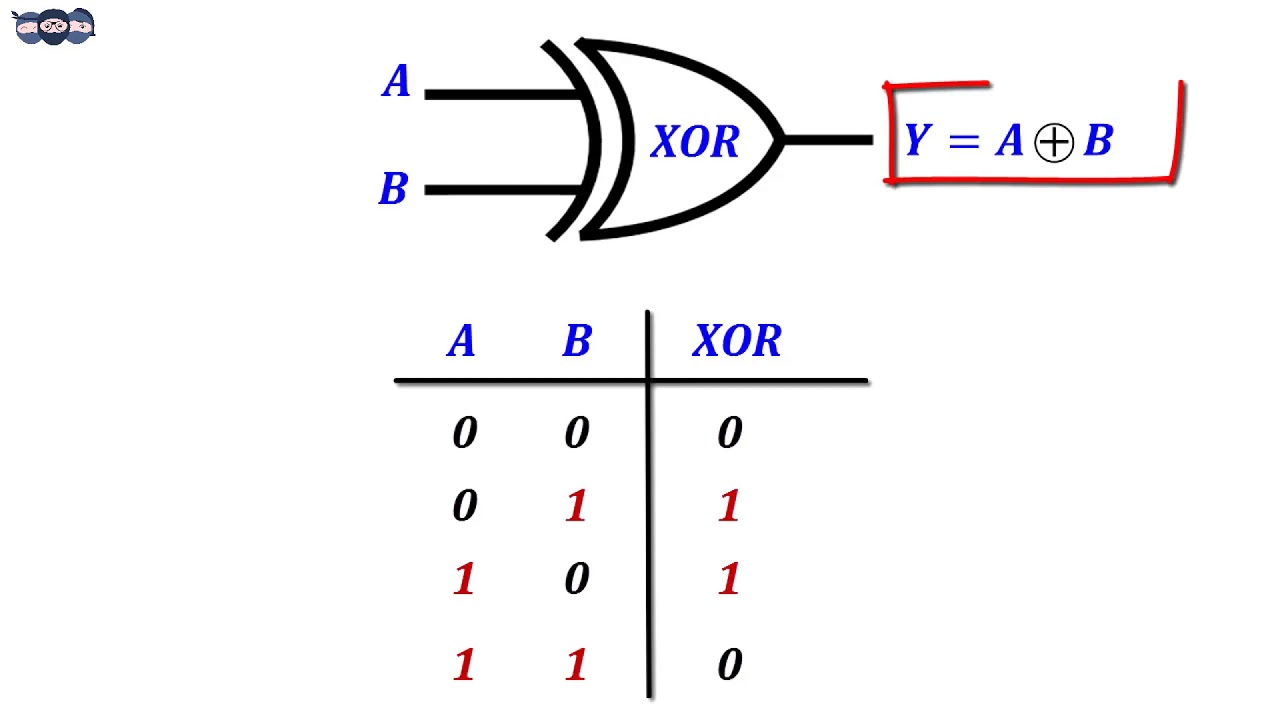

Given that I have the next plaintext string, "**XOR ENCRYPT**", and a key string, "**A SHORT KEY**", use a XOR cipher to encrypt the plaintext.

The result should be given as a series of hex values.

Result: 196f01680a1c177212150d

**Hint**: use the ASCII values of characters

In [2]:

# #  Julian's code
# plaintext = "XOR ENCRYPT"
# key = "A SHORT KEY"

# def string_to_ascii(x):
#     ascii = []
#     for i in x:
#         ascii.append(ord(i))
#     return ascii

# # XOR'ing x and y using the python XOR operator

# plaintext_ascii = string_to_ascii(plaintext)
# key_ascii = string_to_ascii(key)

# result = []

# for i in range(len(plaintext_ascii)):
#     result.append(plaintext_ascii[i]^key_ascii[i])

# hex_result = bytearray(result)
# print(hex_result.hex())

def XOR(plain, key):
  xorred = int.from_bytes(plain.encode(), 'big') ^ int.from_bytes(key.encode(), 'big')
  return hex(xorred)[2:]

plaintext = "XOR ENCRYPT"
key = "A SHORT KEY"
print(XOR(plaintext,key))
# Write your answer here

196f01680a1c177212150d


# **Single-byte XOR cipher** (Taken from cryptopals crypto challenges)



The hex encoded string:

*1b37373331363f78151b7f2b783431333d78397828372d363c78373e783a393b3736*

... has been XOR'd against a single character. Find the key, decrypt the message.

You can do this by hand. But don't: write code to do it for you.

How? Devise some method for "scoring" a piece of English plaintext. Character frequency is a good metric. Evaluate each output and choose the one with the best score. 

In [4]:
from string import ascii_letters

def get_score(message):
    '''
    a function that takes input string and using letter 
    frequency it scores it. The closer the score is 
    to 1.00, the more realistic.
    '''
    score = 0
    freq = {'a': 0.0812, 'b': 0.0149, 'c': 0.0271, 'd': 0.0432,
    'e': 0.1202, 'f': 0.0230, 'g': 0.0202, 'h': 0.0592, 'i': 0.0731,
    'j': 0.001, 'k': 0.0069, 'l': 0.0398, 'm': 0.0261, 'n': 0.0695,
    'o': 0.0768, 'p': 0.0182, 'q': 0.0011, 'r': 0.0602, 's': 0.0628,
    't': 0.091, 'u': 0.0288, 'v': 0.0111, 'w': 0.0209, 'x': 0.0017,
    'y': 0.0211, 'z': 0.0007, ' ': .1}
    for c in message:
        score += freq.get(c, 0) #if it is not an alphabet, give it a score of 0
    return score/len(message)


x = '1b37373331363f78151b7f2b783431333d78397828372d363c78373e783a393b3736'
x = bytes.fromhex(x)
print(x)
x = x.decode()
print(x)


maxScore = 0
result = ''
string = ''
for l in ascii_letters:
  string = str(l)*(len(x)//2)
  if(get_score(XOR(string, x)) > maxScore):
    maxScore = get_score(XOR(x, string))
    result = XOR(x, string)

print(maxScore)
print(string)
print(result)


#ETAOIN SHRDLU
#this doesn't work yet :(
#Write code here


b'\x1b77316?x\x15\x1b\x7f+x413=x9x(7-6<x7>x:9;76'
77316?x+x413=x9x(7-6<x7>x:9;76
0.013930882352941175
ZZZZZZZZZZZZZZZZZ
1b37373331363f78151b7f2b783431333d1e5f1e4e514b505a1e51581e5c5f5d5150
